In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height: 100% !important;
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, clear_output
import os
from ipywidgets import interact, widgets
import matplotlib.pyplot as plt
display(HTML("<style>.container { width:100% !important; }</style>"))

pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print("Input folder location")
folder = input()
#\output\

Input folder location
E:\BP\bachelors-thesis-main\output\


In [4]:
def add_cols_to_df(df):
    df['PROCESSORS'] = None
    df['BASE_CLOCK'] = None
    df['BOOST_CLOCK'] = None
    df['MEMORY_CONFIG'] = None
    df['INTERFACE_WIDTH'] = None
    
    for index, row in df.iterrows():
        gpu_name = row['GPU']
        match gpu_name:
            case "Radeon RX Vega":
                df.at[index, 'PROCESSORS'] = 4096
                df.at[index, 'BASE_CLOCK'] = 1.25
                df.at[index, 'BOOST_CLOCK'] = 1.55
                df.at[index, 'MEMORY_CONFIG'] = 8
                df.at[index, 'INTERFACE_WIDTH'] = 2048
            case "NVIDIA GeForce GTX 1080 Ti":
                df.at[index, 'PROCESSORS'] = 3584
                df.at[index, 'BASE_CLOCK'] = 1.48
                df.at[index, 'BOOST_CLOCK'] = 1.58
                df.at[index, 'MEMORY_CONFIG'] = 11
                df.at[index, 'INTERFACE_WIDTH'] = 352
            case "NVIDIA GeForce RTX 2080 SUPER":
                df.at[index, 'PROCESSORS'] = 3072
                df.at[index, 'BASE_CLOCK'] = 1.65
                df.at[index, 'BOOST_CLOCK'] = 1.82
                df.at[index, 'MEMORY_CONFIG'] = 8
                df.at[index, 'INTERFACE_WIDTH'] = 256
            case "NVIDIA GeForce RTX 3070":
                df.at[index, 'PROCESSORS'] = 5888
                df.at[index, 'BASE_CLOCK'] = 1.50
                df.at[index, 'BOOST_CLOCK'] = 1.73
                df.at[index, 'MEMORY_CONFIG'] = 8
                df.at[index, 'INTERFACE_WIDTH'] = 256
            case "NVIDIA GeForce RTX 3090":
                df.at[index, 'PROCESSORS'] = 10496
                df.at[index, 'BASE_CLOCK'] = 1.40
                df.at[index, 'BOOST_CLOCK'] = 1.70
                df.at[index, 'MEMORY_CONFIG'] = 24
                df.at[index, 'INTERFACE_WIDTH'] = 384
            case "NVIDIA RTX A4000":
                df.at[index, 'PROCESSORS'] = 6144
                df.at[index, 'BASE_CLOCK'] = 0.74
                df.at[index, 'BOOST_CLOCK'] = 1.56
                df.at[index, 'MEMORY_CONFIG'] = 16
                df.at[index, 'INTERFACE_WIDTH'] = 256
    return df

In [5]:
# calculate correlation marix for each file
results_folder = os.path.join(folder, "results")
dataframes = []
for filename in os.listdir(results_folder):
    if filename.endswith('.csv'):
        file_path = os.path.join(results_folder, filename)
        df = pd.read_csv(file_path, index_col=False)
        df = add_cols_to_df(df)
        df_to_corr = df.iloc[:, 2:]
        dataframes.append(df_to_corr)

,SPEED_MIN,SPEED_MAX,SPEED_MEAN,SPEED_MEDIAN,UTIL_MIN,UTIL_MAX,UTIL_MEAN,UTIL_MEDIAN,TEMP_MIN,TEMP_MAX,TEMP_MEAN,TEMP_MEDIAN,MEM_USED_MIN,MEM_USED_MAX,MEM_USED_MEAN,MEM_USED_MEDIAN,MEM_UTIL_MIN,MEM_UTIL_MAX,MEM_UTIL_MEAN,MEM_UTIL_MEDIAN,BUS_UTIL_MIN,BUS_UTIL_MAX,BUS_UTIL_MEAN,BUS_UTIL_MEDIAN,PROCESSORS,BASE_CLOCK,BOOST_CLOCK,MEMORY_CONFIG,INTERFACE_WIDTH
SPEED_MIN,1.000000,0.581720,0.807111,0.797722,-0.024682,-0.003982,-0.003534,-0.044402,-0.007558,-0.003732,-0.003174,-0.001411,-0.067499,-0.079725,-0.111707,-0.113809,-0.067457,-0.056624,-0.104819,-0.104739,-0.009968,0.027800,-0.055440,-0.065828,0.043145,0.007021,0.044859,0.033833,-0.055212
SPEED_MAX,0.581720,1.000000,0.936137,0.902347,-0.081097,-0.000742,-0.001757,-0.064531,-0.030865,-0.003262,-0.002852,-0.001169,-0.074182,-0.092424,-0.138499,-0.159546,-0.077619,-0.073817,-0.137078,-0.156429,-0.015788,0.047004,-0.098128,-0.134595,0.067555,0.005629,0.049143,0.055627,-0.052003
SPEED_MEAN,0.807111,0.936137,1.000000,0.988159,-0.073476,-0.000480,-0.001793,-0.057732,-0.028158,-0.003533,-0.003259,-0.001502,-0.082893,-0.102123,-0.148755,-0.164462,-0.085962,-0.080934,-0.146276,-0.159465,-0.015772,0.051743,-0.094182,-0.128496,0.070959,0.005602,0.053651,0.058525,-0.060536
SPEED_MEDIAN,0.797722,0.902347,0.988159,1.000000,-0.072550,0.000470,-0.001198,-0.049579,-0.026716,-0.003489,-0.003255,-0.001565,-0.084787,-0.104750,-0.152250,-0.168620,-0.088440,-0.085203,-0.151040,-0.164350,-0.016276,0.057222,-0.095711,-0.133802,0.074776,0.003998,0.053509,0.062820,-0.062084
UTIL_MIN,-0.024682,-0.081097,-0.073476,-0.072550,1.000000,-0.004421,-0.008188,0.657993,0.363987,-0.034475,-0.029073,-0.012686,-0.585569,-0.143932,-0.227728,-0.160494,-0.563119,0.055757,-0.041744,0.011897,0.077568,0.697317,0.726692,0.628814,0.110500,0.095219,0.295160,0.174321,-0.652775
UTIL_MAX,-0.003982,-0.000742,-0.000480,0.000470,-0.004421,1.000000,0.887575,-0.010712,-0.158257,-0.000531,-0.000452,-0.000201,-0.012205,-0.020190,-0.019904,-0.015201,-0.011713,-0.014731,-0.016572,-0.009607,-0.001435,-0.001130,-0.003811,0.000878,0.009063,0.004961,0.008678,0.004150,-0.010860
UTIL_MEAN,-0.003534,-0.001757,-0.001793,-0.001198,-0.008188,0.887575,1.000000,-0.020119,-0.140465,-0.000471,-0.000401,-0.000178,-0.011138,-0.019897,-0.018818,-0.015246,-0.011063,-0.016590,-0.017055,-0.011771,-0.000463,-0.007564,-0.006953,-0.001613,0.004509,0.000386,0.006165,0.001570,-0.010011
UTIL_MEDIAN,-0.044402,-0.064531,-0.057732,-0.049579,0.657993,-0.010712,-0.020119,1.000000,0.262340,-0.031480,-0.031630,-0.017466,-0.204689,0.068506,0.029836,0.043164,-0.189507,0.163855,0.125709,0.123471,0.034566,0.513050,0.506299,0.420574,0.013312,0.023956,0.060641,0.045081,-0.243804
TEMP_MIN,-0.007558,-0.030865,-0.028158,-0.026716,0.363987,-0.158257,-0.140465,0.262340,1.000000,0.013645,0.013402,0.007039,-0.288459,-0.019929,-0.034563,0.007912,-0.340034,-0.101006,-0.096242,-0.053229,0.017935,0.297725,0.376041,0.364746,0.341549,-0.244778,0.158555,0.372295,-0.243247
TEMP_MAX,-0.003732,-0.003262,-0.003533,-0.003489,-0.034475,-0.000531,-0.000471,-0.031480,0.013645,1.000000,0.850316,0.377884,-0.002655,-0.006733,-0.005048,-0.002764,-0.003407,-0.008529,-0.006261,-0.003837,-0.002504,-0.008566,-0.010650,-0.008714,0.006857,0.000823,0.001344,0.006829,-0.001396


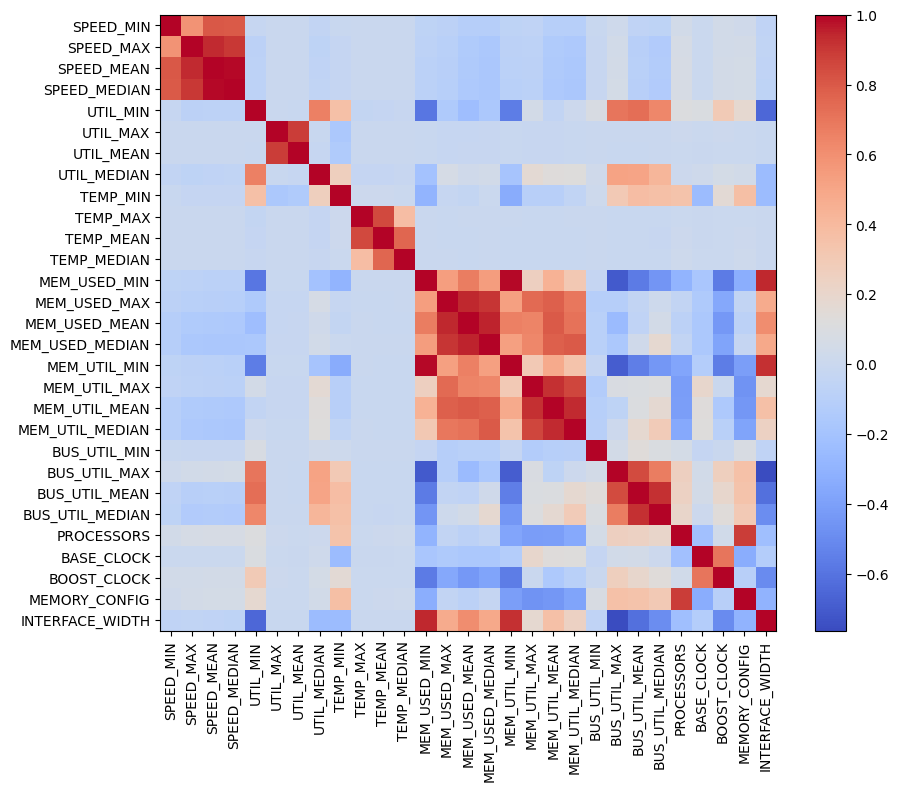

In [6]:
concatenated_df = pd.concat(dataframes)
correlation_matrix = concatenated_df.corr()
#display correlation matrix
display_df = correlation_matrix.style.background_gradient(cmap='coolwarm')
display(display_df)


plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(concatenated_df.columns)), concatenated_df.columns, rotation=90)
plt.yticks(np.arange(len(concatenated_df.columns)), concatenated_df.columns)
plt.title('Correlation Matrix')
plt.show()